# 911 Calls Project

For this project, I have analyzed  911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Following Answers are Tried to Solve in this notebook:


1. What is the number of calls made each day of week and what was the reason of Call?

Insight - This can help police to fulfill the staffing requirement based on emergency skill in which they are trained.

2. What is the Monthwise distribution of overall 911 calls and how the call number is varying based on the Reason of call?
Insight - This can help police to hire seasonal hiring of specialists which can help in the emergency situations 

3. Which specific hour in a regular week, calls are prominent or hour wise distribution of calls with respect to day of week?

Insight -  This info can provide evidence about the peak call hours when maximum staff is required

4. Which specific days in a regular Month, calls are prominent or day wise distribution of calls with respect to Month?

Insight -  This info can provide evidence about the peak call days when calls are done most and hence staff is required accordingly




## Data and Setup

____


In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Reason of call is added in the title column as first string , making it as a separate column in dataframe 

In [21]:
def Reasongetter(value):
    return value.split(':')[0]

In [22]:
df['Reason'] = df['title'].apply(lambda x: Reasongetter(x) )
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call ? **

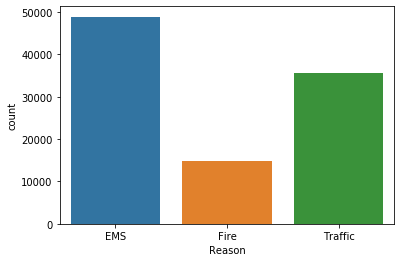

In [24]:
sns.countplot(x='Reason', data=df)

Converting timestamp column type as object type is string and making three different columns as Hour , Month and Day of Week ( which will return 0 as sunday , 1 as Monday .. and converting this to day Name using Map Function)

In [38]:
df['timeStamp'] =pd.to_datetime(df['timeStamp'])


pandas._libs.tslibs.timestamps.Timestamp

In [42]:
df['Hour'] = df['timeStamp'].apply( lambda time:time.hour)
df['Month'] = df['timeStamp'].apply( lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply( lambda time:time.dayofweek)

In [44]:
df['Day of Week'] = df['Day of Week'].map ({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Day wise and Month Wise distribution of number of 911 calls based on the Reason of Call

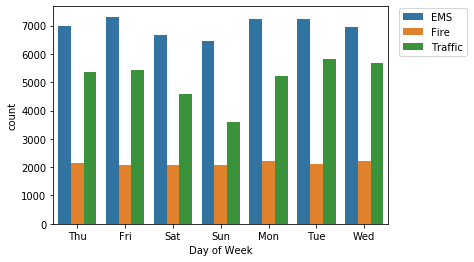

In [65]:
sns.countplot(x='Day of Week', hue = 'Reason', data = df)
plt.legend(bbox_to_anchor=(1.25, 1.015))

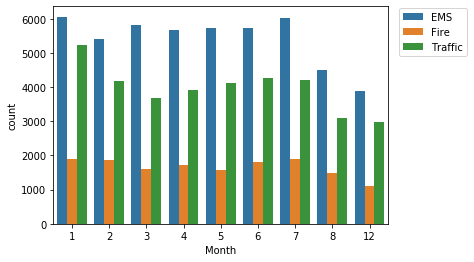

In [66]:
sns.countplot(x='Month', hue = 'Reason', data = df)
plt.legend(bbox_to_anchor=(1.25, 1.015))

It can be seen from Monthwise Distribution that some months are missing means no calls were made during these months . This can be further verified by grouping the data by month and the seeing the call number using line plot and lmplot to see the linear model of the problem

In [68]:
df2= df.groupby('Month').count()

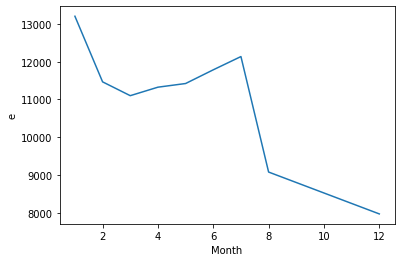

In [76]:
df2.reset_index(inplace=True)
sns.lineplot(x='Month',y='e', data=df2)

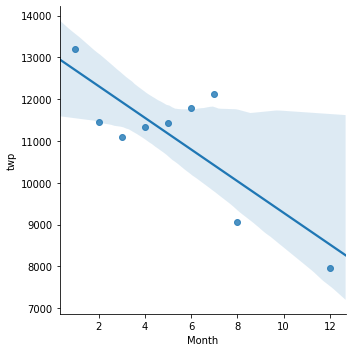

In [77]:
sns.lmplot(x='Month',y='twp',data=df2)

Datewise Distribution of Calls based on the Reason of Call

In [80]:
df['Date'] = df['timeStamp'].apply( lambda time: time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


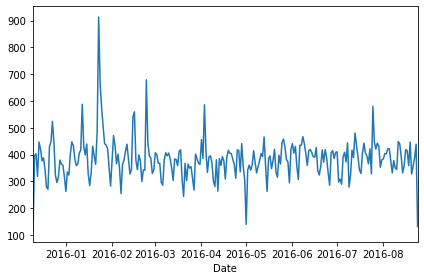

In [88]:
df.groupby('Date').count()['e'].plot()
plt.tight_layout()

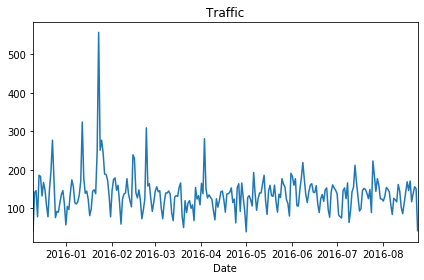

In [95]:
df3 = df[df['Reason']=='Traffic']
df3.groupby('Date').count()['e'].plot()
plt.title('Traffic')
plt.tight_layout()


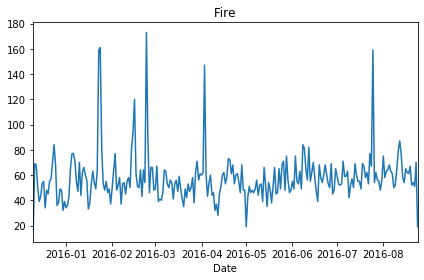

In [96]:
df4 = df[df['Reason']=='Fire']
df4.groupby('Date').count()['e'].plot()
plt.title('Fire')
plt.tight_layout()

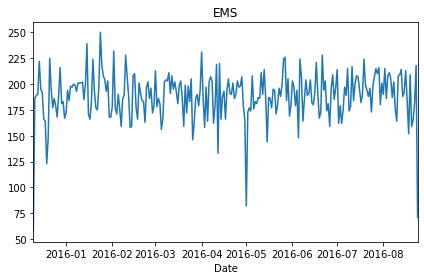

In [97]:
df5 = df[df['Reason']=='EMS']
df5.groupby('Date').count()['e'].plot()
plt.title('EMS')
plt.tight_layout()

Problem statment 3 and 4 can be addressed using the heatmap function and using unstack method to adjust dataframe. Creating heatmap and clustermap of 
1. Day of week vs Hours

2. Month vs Day of Week

In [106]:
df6=df.groupby(['Hour','Day of Week'])['Hour'].count()
df7 =df6.unstack(level=0)


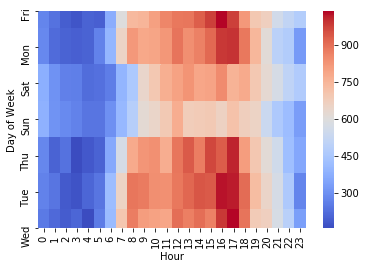

In [108]:
sns.heatmap(df7, cmap='coolwarm')

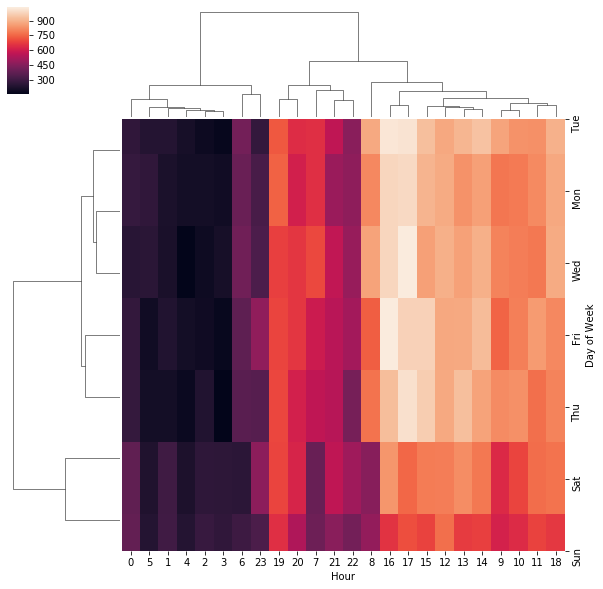

In [109]:
sns.clustermap(df7)

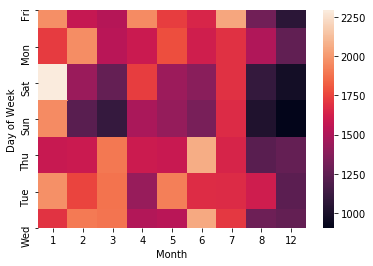

In [113]:
df8 =df.groupby(['Month',"Day of Week"])['Month'].count()
df9 = df8.unstack(level=0)
sns.heatmap(df9)

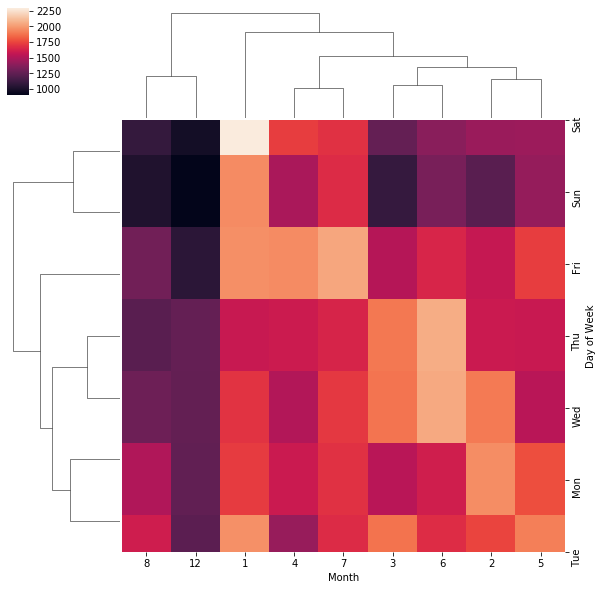

In [115]:
sns.clustermap(df9)

THANKYOU